In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import pandas as pd
import sys

In [32]:
# Loading Data
data = pd.read_excel(r"C:\Users\user\Documents\MEng Mechanical\Honours Modules\MEV 781\balancingdata.xlsx")
print(data.head())

time = np.array(data.iloc[:,0])
tacho = np.array(data.iloc[:,1])
A = np.array(data.iloc[:,2])
B = np.array(data.iloc[:,3])


      Time      Tacho         A         B
0  0.000000  0.580708 -0.002954 -0.005570
1  0.000195  0.551791 -0.001349  0.001012
2  0.000391  0.543807 -0.004262 -0.004006
3  0.000586  0.552870 -0.005044 -0.011019
4  0.000781  0.575744 -0.001187 -0.009401


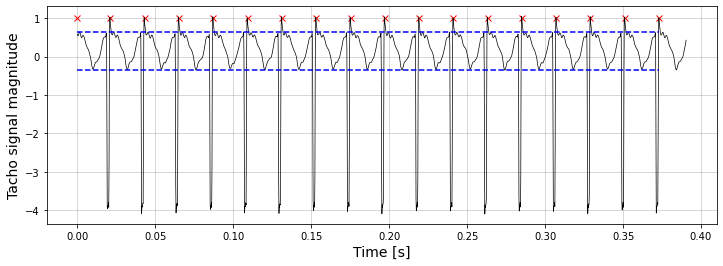

In [122]:
# Plotting Trigger Level

a = 0
trigger = []
tr_l = 1 # tacho trigger level
ta = tacho[:2000]
time_vals = time[:2000]
for i in range (len(ta)):
    if ta[i] < tr_l:
        b = 1
    else:
        b = 0
    if b == 1 and a == 0:
        trigger.append(i)
    a = b
    
plt.figure(figsize = (12, 4))
#plt.title('Tacho Trigger Level = {}'.format(tr_l), fontsize = 16)
plt.plot(time_vals[trigger], tr_l*np.ones(len(trigger)), 'rx', linewidth=2)
plt.plot(time_vals,ta,'k', linewidth=0.7)
plt.plot(time_vals[trigger], 0.638*np.ones(len(trigger)), 'b--', linewidth=1.5)
plt.plot(time_vals[trigger], -0.34*np.ones(len(trigger)), 'b--', linewidth=1.5)
plt.xlabel('Time [s]', size = 14)
plt.ylabel('Tacho signal magnitude', size = 14)
plt.grid(linewidth=0.5)
plt.show()

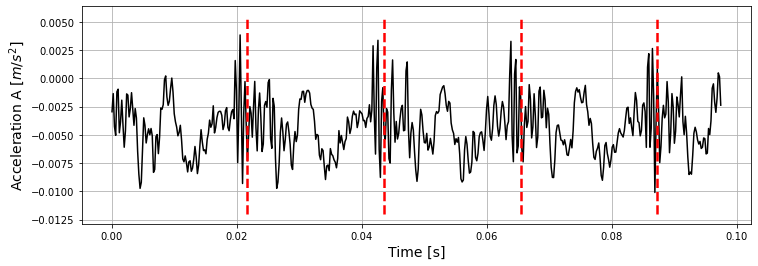

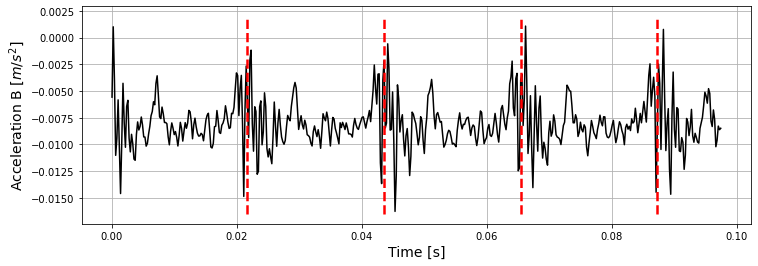

In [123]:
# Methodology

# A
A_vals = A[:500]
time_vals = time[:500]
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(time_vals, A_vals,'k')
#plt.title('Divided Accelerometer A Signal', fontsize = 16)
plt.xlabel('Time [s]', size = 14)
plt.ylabel('Acceleration A $[m/s^2]$', size = 14)
plt.plot([time[111], time[111]], [-0.012, 0.0055], 'r--', linewidth=2.5)
plt.plot([time[223], time[223]], [-0.012, 0.0055], 'r--', linewidth=2.5)
plt.plot([time[335], time[335]], [-0.012, 0.0055], 'r--', linewidth=2.5)
plt.plot([time[447], time[447]], [-0.012, 0.0055], 'r--', linewidth=2.5)
plt.show()

# B
B_vals = B[:500]
time_vals = time[:500]
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(time_vals, B_vals,'k')
#plt.title('Divided Accelerometer B Signal', fontsize = 16)
plt.xlabel('Time [s]', size = 14)
plt.ylabel('Acceleration B $[m/s^2]$', size = 14)
plt.plot([time[111], time[111]], [-0.0165, 0.002], 'r--', linewidth=2.5)
plt.plot([time[223], time[223]], [-0.0165, 0.002], 'r--', linewidth=2.5)
plt.plot([time[335], time[335]], [-0.0165, 0.002], 'r--', linewidth=2.5)
plt.plot([time[447], time[447]], [-0.0165, 0.002], 'r--', linewidth=2.5)
plt.show()

In [82]:
# STA Code

def synchronous(tacho, triglevel, data, t, slope):
    ind = np.where(np.diff(np.sign(tacho - triglevel)))[0]
    time_frame = []
    for i in range(len(ind)-2):
        time_frame.append(ind[i+2]-ind[i])
    time_frame = int(round(np.mean(time_frame)))
    index =[]
    if slope > 0:
        for i in range(len(ind)-1):
            step = ind[i+1] - ind[i]
            if step >= (time_frame/2):
                index.append(ind[i])
    if slope < 0:
        for i in range(len(ind)-1):
            step = ind[i+1] - ind[i]
            if step >= (time_frame/2):
                index.append(ind[i-1])
    sec = len(index)
    aver_mat = np.zeros([time_frame, sec])
    for i in range(sec):
        for j in range(time_frame):
            aver_mat[j, i] = data[index[i]+j-1]
    aver_vec = []
    for i in range(time_frame):
        aver_vec.append(np.mean(aver_mat[i, :]).T)
    signal = []
    for i in range (int(sec/4)):
        signal.append(aver_vec)
    t_out = t[0:len(aver_mat[:, 1])]
    
    return aver_mat, aver_vec, t_out, np.array(signal).flatten(), index

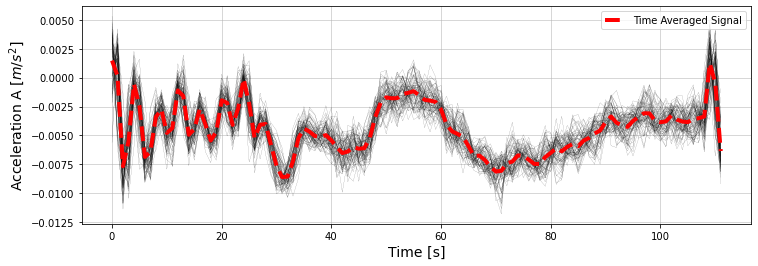

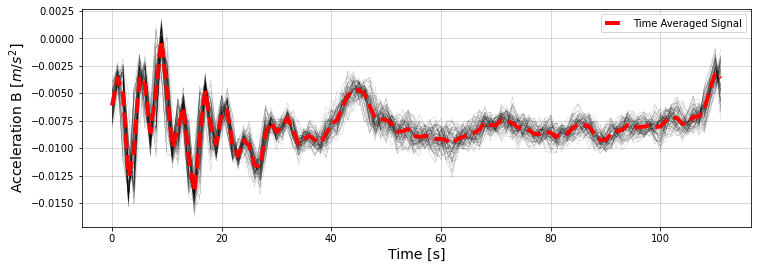

In [101]:
matA =(synchronous(tacho,triglevel=1, data=A, t=time, slope=-1))[0]
vecA =(synchronous(tacho,triglevel=1, data=A, t=time, slope=-1))[1] 

plt.figure(1, figsize =(12,4))
plt.grid(linewidth=0.5)
#plt.title('Synchronous Time Averaged Signal for Accelerometer A', fontsize=16)
plt.xlabel('Time [s]', size =14)
plt.ylabel('Acceleration A $[m/s^2]$', size =14)
for i in range(matA.shape[1]):
    plt.plot(matA[:,i], 'k', linewidth = 0.1)
plt.plot(vecA, 'r--', linewidth = 4,label='Time Averaged Signal')
plt.legend(loc='upper right')
plt.show()

matB =(synchronous(tacho,triglevel=1, data=B, t=time, slope=-1))[0] 
vecB =(synchronous(tacho,triglevel=1, data=B, t=time, slope=-1))[1]

plt.figure(2, figsize =(12,4))
plt.grid(linewidth=0.5)
#plt.title('Synchronous Time Averaged Signal for Accelerometer B', fontsize=16)
plt.xlabel('Time [s]',size =14)
plt.ylabel('Acceleration B $[m/s^2]$', size =14)
for i in range(matB.shape[1]):
    plt.plot(matB[:,i], 'k', linewidth = 0.1)
plt.plot(vecB, 'r--', linewidth = 4,label='Time Averaged Signal')
plt.legend(loc='upper right')
plt.show()

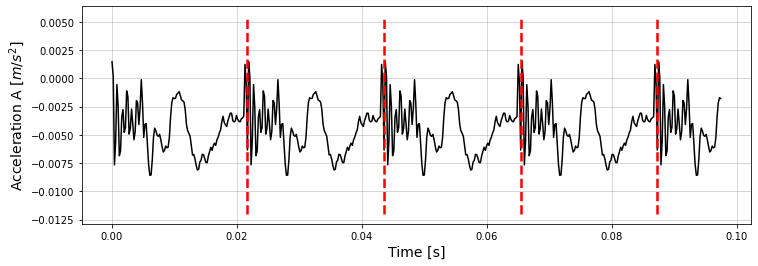

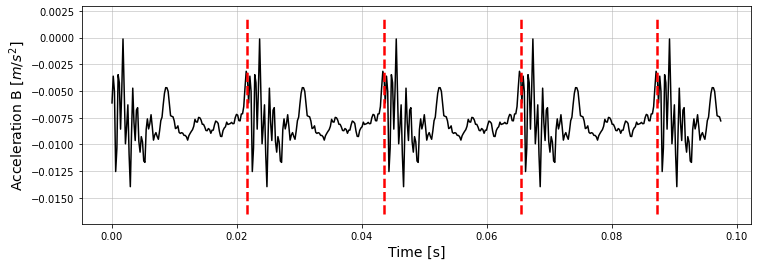

In [124]:
# Original vs synchronised signal: (play around with sizes to get one that looks good)

# A
plt.figure(figsize=(12,4))
yA = (synchronous(tacho, triglevel=1, data=A, t=time, slope=-1))[3][:500] 
time_vals = time[:500]

# # plt.figure(2, figsize=(12,4))
# plt.subplot(121)
# plt.grid(linewidth=0.5)
# plt.plot(time, A, linewidth=0.5)
# plt.title('Original Signal from Accelerometer A')
# plt.xlabel('Time')
# plt.ylabel('Acceleration $[m/s^2]$')

# plt.figure(1, figsize=(12,4))
plt.grid(linewidth=0.5)
plt.plot(time_vals, yA,'k')
#plt.title('STA of Accelerometer A')
plt.xlabel('Time [s]', size = 14)
plt.ylabel('Acceleration A $[m/s^2]$', size = 14)
plt.plot([time[111], time[111]], [-0.012, 0.0055], 'r--', linewidth=2.5)
plt.plot([time[223], time[223]], [-0.012, 0.0055], 'r--', linewidth=2.5)
plt.plot([time[335], time[335]], [-0.012, 0.0055], 'r--', linewidth=2.5)
plt.plot([time[447], time[447]], [-0.012, 0.0055], 'r--', linewidth=2.5)
plt.show()
plt.show()


# B
yB = (synchronous(tacho, triglevel=1, data=B, t=time, slope=-1))[3][:500]

# # plt.figure(2, figsize=(12,4))
# plt.subplot(121)
# plt.grid(linewidth=0.5)
# plt.plot(time, B, linewidth=0.5)
# plt.title('Original Signal from Accelerometer B')
# plt.xlabel('Time')
# plt.ylabel('Acceleration $[m/s^2]$')
plt.figure(figsize=(12,4))
plt.grid(linewidth=0.5)
plt.plot(time_vals, yB,'k')
#plt.title('STA of Accelerometer B')
plt.xlabel('Time [s]', size = 14)
plt.ylabel('Acceleration B $[m/s^2]$', size = 14)
plt.plot([time[111], time[111]], [-0.0165, 0.002], 'r--', linewidth=2.5)
plt.plot([time[223], time[223]], [-0.0165, 0.002], 'r--', linewidth=2.5)
plt.plot([time[335], time[335]], [-0.0165, 0.002], 'r--', linewidth=2.5)
plt.plot([time[447], time[447]], [-0.0165, 0.002], 'r--', linewidth=2.5)
plt.show()



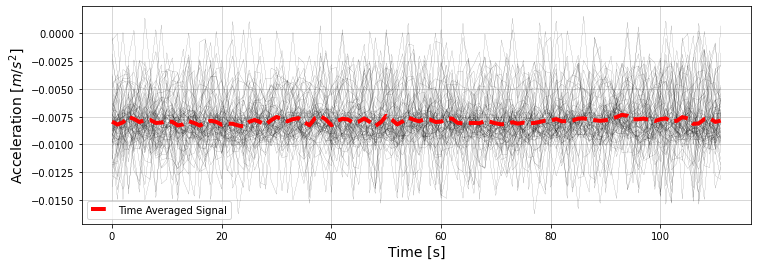

In [134]:
matA = aver_mat
vecA = aver_vec
plt.figure(figsize=(12,4))
#plt.title('Non-Synchronous Averaged Signal of A',fontsize=16)
plt.ylabel('Acceleration $[m/s^2]$', fontsize=14)
plt.xlabel('Time [s]', fontsize=14)
plt.grid(linewidth=0.5)
for i in range(matA.shape[1]):
    plt.plot(matA[:,i], 'k', linewidth = 0.1)
plt.plot(vecA, 'r--', linewidth = 4,label='Time Averaged Signal')
plt.legend()
plt.show()

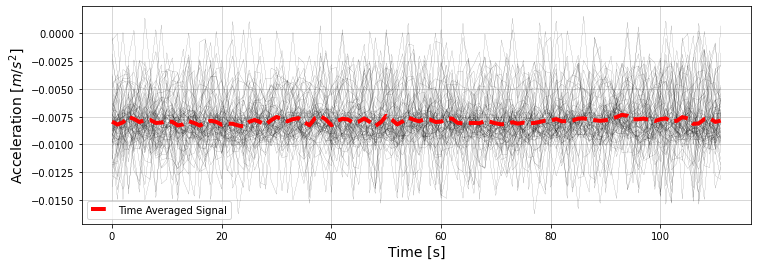

In [133]:
matB = aver_mat
vecB = aver_vec
plt.figure(figsize=(12,4))
#plt.title('Non-Synchronous Averaged Signal of B',fontsize=16)
plt.ylabel('Acceleration $[m/s^2]$', fontsize=14)
plt.xlabel('Time [s]', fontsize=14)
plt.grid(linewidth=0.5)
for i in range(matB.shape[1]):
    plt.plot(matB[:,i], 'k', linewidth = 0.1)
plt.plot(vecB, 'r--', linewidth = 4,label='Time Averaged Signal')
plt.legend()
plt.show()